# Top Stocks Prediction

In [1]:
pip install yahoo-fin

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Prachi' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Prachi' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
# Imports
from pandas_datareader import data as pdr
from yahoo_fin import stock_info as si
from pandas import ExcelWriter
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
from math import sqrt
yf.pdr_override()

In [4]:
# get list of Dow stocks
#dow_list = si.tickers_dow()
 
# get list of NASDAQ stocks
#nasdaq_list = si.tickers_nasdaq()

# get list of S&P 500 stocks
sp500_list = si.tickers_sp500() 

C:\Users\Prachi Gopalani\Anaconda\envs\Hackthon\lib\site-packages\yahoo_fin\stock_info.py:130: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500["Symbol"] = sp500["Symbol"].str.replace(".", "-")


In [5]:
#print(len(dow_list))
#print(len(nasdaq_list))
print(len(sp500_list))

505


In [6]:
#dow_list = [item.replace(".", "-") for item in dow_list] # Yahoo Finance uses dashes instead of dots
#nasdaq_list = [item.replace(".", "-") for item in nasdaq_list]
sp500_list = [item.replace(".", "-") for item in sp500_list]

In [7]:
tickers =  sp500_list # + nasdaq_list

In [8]:
len(tickers)

505

In [9]:
tickers[:5]

['A', 'AAL', 'AAP', 'AAPL', 'ABBV']

In [8]:
# Variables
index_name = list(['^GSPC','^DJI']) # S&P 500, Dow Jones, Nasdaq , '^IXIC'
start_date = datetime.datetime.now() - datetime.timedelta(days=365)
end_date = datetime.date.today()
exportList = pd.DataFrame(columns=['Stock', "RS_Rating", "50 Day MA", "150 Day Ma", "200 Day MA", "52 Week Low", "52 week High"])
returns_multiples = []

In [9]:
# Index Returns
index_df = pdr.get_data_yahoo(index_name, start_date, end_date)
index_df

[*********************100%***********************]  2 of 2 completed


Adj Close                      Close               \
                    ^DJI        ^GSPC          ^DJI        ^GSPC   
Date                                                               
2020-03-09  23851.019531  2746.560059  23851.019531  2746.560059   
2020-03-10  25018.160156  2882.229980  25018.160156  2882.229980   
2020-03-11  23553.220703  2741.379883  23553.220703  2741.379883   
2020-03-12  21200.619141  2480.639893  21200.619141  2480.639893   
2020-03-13  23185.619141  2711.020020  23185.619141  2711.020020   
...                  ...          ...           ...          ...   
2021-03-02  31391.519531  3870.290039  31391.519531  3870.290039   
2021-03-03  31270.089844  3819.719971  31270.089844  3819.719971   
2021-03-04  30924.140625  3768.469971  30924.140625  3768.469971   
2021-03-05  31496.300781  3841.939941  31496.300781  3841.939941   
2021-03-08  31802.439453  3821.350098  31802.439453  3821.350098   

                    High                        Low               \
                    ^DJI        ^GSPC          ^DJI        ^GSPC   
Date                                                               
2020-03-09  24992.359375  2863.889893  23706.070312  2734.429932   
2020-03-10  25020.990234  2882.590088  23690.339844  2734.000000   
2020-03-11  24604.630859  2825.600098  23328.320312  2707.219971   
2020-03-12  22837.949219  2660.949951  21154.460938  2478.860107   
2020-03-13  23189.759766  2711.330078  21285.369141  2492.370117   
...                  ...          ...           ...          ...   
2021-03-02  31623.269531  3906.409912  31377.160156  3868.570068   
2021-03-03  31563.310547  3874.469971  31260.140625  3818.860107   
2021-03-04  31461.970703  3843.669922  30547.529297  3723.340088   
2021-03-05  31580.330078  3851.689941  30766.810547  3730.189941   
2021-03-08  32148.039062  3881.060059  31512.150391  3819.250000   

                    Open                Volume              
                    ^DJI        ^GSPC     ^DJI       ^GSPC  
Date                                                        
2020-03-09  24992.359375  2863.889893  7504300  8423050000  
2020-03-10  24453.000000  2813.479980  6548600  7635960000  
2020-03-11  24604.630859  2825.600098  6639600  7374110000  
2020-03-12  22184.710938  2630.860107  9082600  8829380000  
2020-03-13  21973.820312  2569.989990  8430800  8258670000  
...                  ...          ...      ...         ...  
2021-03-02  31535.369141  3903.639893  3372700  5493690000  
2021-03-03  31352.960938  3863.989990  4096600  6150790000  
2021-03-04  31289.009766  3818.530029  5378500  7142240000  
2021-03-05  31029.179688  3793.580078  5018100  6842570000  
2021-03-08  31512.150391  3844.389893  4969800  5852240000  

[252 rows x 12 columns]

In [10]:
index_df[['Percent Change_DJI','Percent Change_GSPC']] = index_df['Adj Close'].pct_change()
index_df #,'Percent Change_IXIC'

Adj Close                      Close               \
                    ^DJI        ^GSPC          ^DJI        ^GSPC   
Date                                                               
2020-03-09  23851.019531  2746.560059  23851.019531  2746.560059   
2020-03-10  25018.160156  2882.229980  25018.160156  2882.229980   
2020-03-11  23553.220703  2741.379883  23553.220703  2741.379883   
2020-03-12  21200.619141  2480.639893  21200.619141  2480.639893   
2020-03-13  23185.619141  2711.020020  23185.619141  2711.020020   
...                  ...          ...           ...          ...   
2021-03-02  31391.519531  3870.290039  31391.519531  3870.290039   
2021-03-03  31270.089844  3819.719971  31270.089844  3819.719971   
2021-03-04  30924.140625  3768.469971  30924.140625  3768.469971   
2021-03-05  31496.300781  3841.939941  31496.300781  3841.939941   
2021-03-08  31802.439453  3821.350098  31802.439453  3821.350098   

                    High                        Low               \
                    ^DJI        ^GSPC          ^DJI        ^GSPC   
Date                                                               
2020-03-09  24992.359375  2863.889893  23706.070312  2734.429932   
2020-03-10  25020.990234  2882.590088  23690.339844  2734.000000   
2020-03-11  24604.630859  2825.600098  23328.320312  2707.219971   
2020-03-12  22837.949219  2660.949951  21154.460938  2478.860107   
2020-03-13  23189.759766  2711.330078  21285.369141  2492.370117   
...                  ...          ...           ...          ...   
2021-03-02  31623.269531  3906.409912  31377.160156  3868.570068   
2021-03-03  31563.310547  3874.469971  31260.140625  3818.860107   
2021-03-04  31461.970703  3843.669922  30547.529297  3723.340088   
2021-03-05  31580.330078  3851.689941  30766.810547  3730.189941   
2021-03-08  32148.039062  3881.060059  31512.150391  3819.250000   

                    Open                Volume             Percent Change_DJI  \
                    ^DJI        ^GSPC     ^DJI       ^GSPC                      
Date                                                                            
2020-03-09  24992.359375  2863.889893  7504300  8423050000                NaN   
2020-03-10  24453.000000  2813.479980  6548600  7635960000           0.048935   
2020-03-11  24604.630859  2825.600098  6639600  7374110000          -0.058555   
2020-03-12  22184.710938  2630.860107  9082600  8829380000          -0.099884   
2020-03-13  21973.820312  2569.989990  8430800  8258670000           0.093629   
...                  ...          ...      ...         ...                ...   
2021-03-02  31535.369141  3903.639893  3372700  5493690000          -0.004566   
2021-03-03  31352.960938  3863.989990  4096600  6150790000          -0.003868   
2021-03-04  31289.009766  3818.530029  5378500  7142240000          -0.011063   
2021-03-05  31029.179688  3793.580078  5018100  6842570000           0.018502   
2021-03-08  31512.150391  3844.389893  4969800  5852240000           0.009720   

           Percent Change_GSPC  
                                
Date                            
2020-03-09                 NaN  
2020-03-10            0.049396  
2020-03-11           -0.048868  
2020-03-12           -0.095113  
2020-03-13            0.092871  
...                        ...  
2021-03-02           -0.008081  
2021-03-03           -0.013066  
2021-03-04           -0.013417  
2021-03-05            0.019496  
2021-03-08           -0.005359  

[252 rows x 14 columns]

In [11]:
#index_return_DJI = (index_df['Percent Change_DJI'] + 1).cumprod()[-1]
#index_return_DJI

In [12]:
index_return_GSPC = (index_df['Percent Change_GSPC'] + 1).cumprod()[-1]
index_return_GSPC

1.3913222416890458

In [13]:
#index_return__IXIC = (index_df['Percent Change_IXIC'] + 1).cumprod()[-1]
#index_return__IXIC

In [14]:
m = {}
pc = {}
sr = {}

In [15]:
def calc_return(tickers,index_return,index_name):
      for ticker in tickers:
              # Download historical data as CSV for each stock (makes the process faster)
              df = pdr.get_data_yahoo(ticker, start_date, end_date)
              df.to_csv(f'{ticker}.csv')

              # Calculating returns relative to the market (returns multiple)
              df['Percent Change'] = df['Adj Close'].pct_change()
              stock_return = (df['Percent Change'] + 1).cumprod()[-1]
    
              returns_multiple = round((stock_return / index_return), 2)
              returns_multiples.extend([returns_multiple])
    
              print (f'Ticker: {ticker}; Returns Multiple against {index_name}: {returns_multiple}\n')
              m[ticker] = returns_multiple
              pc[ticker] = stock_return
              sr[ticker] = df['Percent Change']


In [16]:
#calc_return(dow_list, index_return_DJI, "Dow Jones")
#calc_return(nasdaq_list, index_return__IXIC, "NASDAQ")
calc_return(sp500_list, index_return_GSPC, "S&P500")

[*********************100%***********************]  1 of 1 completed
Ticker: A; Returns Multiple against S&P500: 1.19

[*********************100%***********************]  1 of 1 completed
Ticker: AAL; Returns Multiple against S&P500: 1.05

[*********************100%***********************]  1 of 1 completed
Ticker: AAP; Returns Multiple against S&P500: 0.98

[*********************100%***********************]  1 of 1 completed
Ticker: AAPL; Returns Multiple against S&P500: 1.27

[*********************100%***********************]  1 of 1 completed
Ticker: ABBV; Returns Multiple against S&P500: 0.94

[*********************100%***********************]  1 of 1 completed
Ticker: ABC; Returns Multiple against S&P500: 0.94

[*********************100%***********************]  1 of 1 completed
Ticker: ABMD; Returns Multiple against S&P500: 1.31

[*********************100%***********************]  1 of 1 completed
Ticker: ABT; Returns Multiple against S&P500: 1.1

[*********************100%******

[*********************100%***********************]  1 of 1 completed
Ticker: BMY; Returns Multiple against S&P500: 0.78

[*********************100%***********************]  1 of 1 completed
Ticker: BR; Returns Multiple against S&P500: 1.13

[*********************100%***********************]  1 of 1 completed
Ticker: BRK-B; Returns Multiple against S&P500: 0.96

[*********************100%***********************]  1 of 1 completed
Ticker: BSX; Returns Multiple against S&P500: 0.83

[*********************100%***********************]  1 of 1 completed
Ticker: BWA; Returns Multiple against S&P500: 1.4

[*********************100%***********************]  1 of 1 completed
Ticker: BXP; Returns Multiple against S&P500: 0.66

[*********************100%***********************]  1 of 1 completed
Ticker: C; Returns Multiple against S&P500: 1.05

[*********************100%***********************]  1 of 1 completed
Ticker: CAG; Returns Multiple against S&P500: 0.98

[*********************100%********

[*********************100%***********************]  1 of 1 completed
Ticker: DLTR; Returns Multiple against S&P500: 0.93

[*********************100%***********************]  1 of 1 completed
Ticker: DOV; Returns Multiple against S&P500: 1.03

[*********************100%***********************]  1 of 1 completed
Ticker: DOW; Returns Multiple against S&P500: 1.58

[*********************100%***********************]  1 of 1 completed
Ticker: DPZ; Returns Multiple against S&P500: 0.72

[*********************100%***********************]  1 of 1 completed
Ticker: DRE; Returns Multiple against S&P500: 0.92

[*********************100%***********************]  1 of 1 completed
Ticker: DRI; Returns Multiple against S&P500: 1.34

[*********************100%***********************]  1 of 1 completed
Ticker: DTE; Returns Multiple against S&P500: 0.91

[*********************100%***********************]  1 of 1 completed
Ticker: DUK; Returns Multiple against S&P500: 0.72

[*********************100%*****

[*********************100%***********************]  1 of 1 completed
Ticker: GPN; Returns Multiple against S&P500: 0.89

[*********************100%***********************]  1 of 1 completed
Ticker: GPS; Returns Multiple against S&P500: 1.76

[*********************100%***********************]  1 of 1 completed
Ticker: GRMN; Returns Multiple against S&P500: 1.11

[*********************100%***********************]  1 of 1 completed
Ticker: GS; Returns Multiple against S&P500: 1.42

[*********************100%***********************]  1 of 1 completed
Ticker: GWW; Returns Multiple against S&P500: 1.14

[*********************100%***********************]  1 of 1 completed
Ticker: HAL; Returns Multiple against S&P500: 2.17

[*********************100%***********************]  1 of 1 completed
Ticker: HAS; Returns Multiple against S&P500: 1.09

[*********************100%***********************]  1 of 1 completed
Ticker: HBAN; Returns Multiple against S&P500: 1.34

[*********************100%*****

[*********************100%***********************]  1 of 1 completed
Ticker: LEG; Returns Multiple against S&P500: 1.07

[*********************100%***********************]  1 of 1 completed
Ticker: LEN; Returns Multiple against S&P500: 1.16

[*********************100%***********************]  1 of 1 completed
Ticker: LH; Returns Multiple against S&P500: 0.98

[*********************100%***********************]  1 of 1 completed
Ticker: LHX; Returns Multiple against S&P500: 0.75

[*********************100%***********************]  1 of 1 completed
Ticker: LIN; Returns Multiple against S&P500: 1.07

[*********************100%***********************]  1 of 1 completed
Ticker: LKQ; Returns Multiple against S&P500: 1.19

[*********************100%***********************]  1 of 1 completed
Ticker: LLY; Returns Multiple against S&P500: 1.12

[*********************100%***********************]  1 of 1 completed
Ticker: LMT; Returns Multiple against S&P500: 0.72

[*********************100%*******

[*********************100%***********************]  1 of 1 completed
Ticker: NVDA; Returns Multiple against S&P500: 1.36

[*********************100%***********************]  1 of 1 completed
Ticker: NVR; Returns Multiple against S&P500: 0.93

[*********************100%***********************]  1 of 1 completed
Ticker: NWL; Returns Multiple against S&P500: 1.39

[*********************100%***********************]  1 of 1 completed
Ticker: NWS; Returns Multiple against S&P500: 1.62

[*********************100%***********************]  1 of 1 completed
Ticker: NWSA; Returns Multiple against S&P500: 1.75

[*********************100%***********************]  1 of 1 completed
Ticker: O; Returns Multiple against S&P500: 0.62

[*********************100%***********************]  1 of 1 completed
Ticker: ODFL; Returns Multiple against S&P500: 1.3

[*********************100%***********************]  1 of 1 completed
Ticker: OKE; Returns Multiple against S&P500: 1.05

[*********************100%******

[*********************100%***********************]  1 of 1 completed
Ticker: SLB; Returns Multiple against S&P500: 1.26

[*********************100%***********************]  1 of 1 completed
Ticker: SLG; Returns Multiple against S&P500: 0.79

[*********************100%***********************]  1 of 1 completed
Ticker: SNA; Returns Multiple against S&P500: 1.22

[*********************100%***********************]  1 of 1 completed
Ticker: SNPS; Returns Multiple against S&P500: 1.23

[*********************100%***********************]  1 of 1 completed
Ticker: SO; Returns Multiple against S&P500: 0.72

[*********************100%***********************]  1 of 1 completed
Ticker: SPG; Returns Multiple against S&P500: 0.82

[*********************100%***********************]  1 of 1 completed
Ticker: SPGI; Returns Multiple against S&P500: 1.02

[*********************100%***********************]  1 of 1 completed
Ticker: SRE; Returns Multiple against S&P500: 0.72

[*********************100%*****

[*********************100%***********************]  1 of 1 completed
Ticker: WAB; Returns Multiple against S&P500: 0.98

[*********************100%***********************]  1 of 1 completed
Ticker: WAT; Returns Multiple against S&P500: 1.0

[*********************100%***********************]  1 of 1 completed
Ticker: WBA; Returns Multiple against S&P500: 0.75

[*********************100%***********************]  1 of 1 completed
Ticker: WDC; Returns Multiple against S&P500: 1.06

[*********************100%***********************]  1 of 1 completed
Ticker: WEC; Returns Multiple against S&P500: 0.62

[*********************100%***********************]  1 of 1 completed
Ticker: WELL; Returns Multiple against S&P500: 0.84

[*********************100%***********************]  1 of 1 completed
Ticker: WFC; Returns Multiple against S&P500: 0.88

[*********************100%***********************]  1 of 1 completed
Ticker: WHR; Returns Multiple against S&P500: 1.33

[*********************100%******

In [17]:
import csv
with open('return_multiple.csv', 'w') as f:
    for key in m.keys():
        f.write("%s,%s\n"%(key,m[key]))

In [18]:
with open('percent_change.csv', 'w') as f:
    for key in pc.keys():
        f.write("%s,%s\n"%(key,pc[key]))

In [19]:
with open('stock_return.csv', 'w') as f:
    for key in sr.keys():
        f.write("%s,%s\n"%(key,sr[key]))

In [20]:
# Creating dataframe of only top 10%
rs_df = pd.DataFrame(list(zip(tickers, returns_multiples)), columns=['Ticker', 'Returns_multiple'])
rs_df['RS_Rating'] = rs_df.Returns_multiple.rank(pct=True) * 100
rs_df = rs_df[rs_df.RS_Rating >= rs_df.RS_Rating.quantile(.90)]

In [21]:
rs_df  # top 10%

,Ticker,Returns_multiple,RS_Rating
23,ALGN,1.64,94.455446
28,AMAT,1.48,90.198020
33,AMP,1.51,90.792079
41,APA,1.76,96.336634
44,APTV,1.51,90.792079
77,CARR,2.24,98.514851
78,CAT,1.57,92.871287
89,CFG,1.53,91.386139
97,CMA,1.54,91.782178
116,CTLT,1.66,94.851485


In [22]:
rs_stocks = rs_df['Ticker']

In [23]:
# Checking Minervini conditions of top 10% of stocks in given list
for stock in rs_stocks:    
    try:
        df = pd.read_csv(f'{stock}.csv', index_col=0)
        sma = [50, 150, 200]  # simple moving average
        for x in sma:
            df["SMA_"+str(x)] = round(df['Adj Close'].rolling(window=x).mean(), 2)  # calculating sma 
        
        # Storing required values 
        currentClose = df["Adj Close"][-1]
        moving_average_50 = df["SMA_50"][-1]
        moving_average_150 = df["SMA_150"][-1]
        moving_average_200 = df["SMA_200"][-1]
        low_of_52week = round(min(df["Low"][-260:]), 2)  # 5 days a week
        high_of_52week = round(max(df["High"][-260:]), 2)
        RS_Rating = round(rs_df[rs_df['Ticker']==stock].RS_Rating.tolist()[0])
        
        try:
            moving_average_200_20 = df["SMA_200"][-20]
        except Exception:
            moving_average_200_20 = 0

        # Condition 1: Current Price > 150 SMA and > 200 SMA
        condition_1 = currentClose > moving_average_150 > moving_average_200
        
        # Condition 2: 150 SMA and > 200 SMA
        condition_2 = moving_average_150 > moving_average_200

        # Condition 3: 200 SMA trending up for at least 1 month
        condition_3 = moving_average_200 > moving_average_200_20
        
        # Condition 4: 50 SMA > 150 SMA and 50 SMA> 200 SMA
        condition_4 = moving_average_50 > moving_average_150 > moving_average_200
           
        # Condition 5: Current Price > 50 SMA
        condition_5 = currentClose > moving_average_50
           
        # Condition 6: Current Price is at least 30% above 52 week low
        condition_6 = currentClose >= (1.3*low_of_52week)
           
        # Condition 7: Current Price is within 25% of 52 week high
        condition_7 = currentClose >= (.75*high_of_52week)
        
        # If all conditions above are true, add stock to exportList
        if(condition_1 and condition_2 and condition_3 and condition_4 and condition_5 and condition_6 and condition_7):
            exportList = exportList.append({'Stock': stock, "RS_Rating": RS_Rating ,"50 Day MA": moving_average_50, "150 Day Ma": moving_average_150, "200 Day MA": moving_average_200, "52 Week Low": low_of_52week, "52 week High": high_of_52week}, ignore_index=True)
            print (stock + " made the Minervini requirements")
    except Exception as e:
        print (e)
        print(f"Could not gather data on {stock}")

AMAT made the Minervini requirements
AMP made the Minervini requirements
APA made the Minervini requirements
APTV made the Minervini requirements
CAT made the Minervini requirements
CFG made the Minervini requirements
CMA made the Minervini requirements
DD made the Minervini requirements
DE made the Minervini requirements
DISCA made the Minervini requirements
DISCK made the Minervini requirements
DOW made the Minervini requirements
DVN made the Minervini requirements
EMN made the Minervini requirements
F made the Minervini requirements
FANG made the Minervini requirements
FCX made the Minervini requirements
FITB made the Minervini requirements
GM made the Minervini requirements
GPS made the Minervini requirements
HAL made the Minervini requirements
HES made the Minervini requirements
IR made the Minervini requirements
IVZ made the Minervini requirements
LB made the Minervini requirements
MGM made the Minervini requirements
MOS made the Minervini requirements
MRO made the Minervini requ

In [24]:
exportList = exportList.sort_values(by='RS_Rating', ascending=False)
print('\n', exportList)
writer = ExcelWriter("ScreenOutput.xlsx")
exportList.to_excel(writer, "Sheet1")
writer.save()


     Stock RS_Rating  50 Day MA  150 Day Ma  200 Day MA  52 Week Low  \
40   VIAC       100      52.21       37.32       33.80        10.10   
16    FCX       100      30.95       22.42       19.69         4.82   
27    MRO        99       8.73        6.34        6.25         3.02   
36   SIVB        99     469.44      348.01      315.12       127.39   
12    DVN        99      19.17       13.90       13.22         4.70   
15   FANG        99      62.60       44.78       44.17        14.55   
39    URI        98     265.69      218.43      201.53        58.85   
9   DISCA        98      42.84       29.82       27.78        17.12   
20    HAL        98      20.17       16.75       15.82         4.25   
41   ZBRA        97     429.98      347.32      326.26       150.06   
24     LB        97      46.54       37.39       32.31         8.00   
26    MOS        97      27.63       21.88       19.65         6.50   
33    PXD        97     131.61      108.15      105.07        48.62   
32  

# Fetching Data

In [25]:
ticker_list= exportList['Stock']
ticker_list = ticker_list[:10]

In [26]:
ticker_list

40     VIAC
16      FCX
27      MRO
36     SIVB
12      DVN
15     FANG
39      URI
9     DISCA
20      HAL
41     ZBRA
Name: Stock, dtype: object

In [27]:
#Interval required 5 minutes
data = yf.download(tickers=list(ticker_list), period='1y', interval='1d')
data

[*********************100%***********************]  10 of 10 completed


Adj Close                                                         \
                DISCA        DVN       FANG        FCX        HAL        MRO   
Date                                                                           
2020-03-09  23.650000   7.880013  25.955980   8.230000   8.059831   3.598054   
2020-03-10  25.080000   8.482548  28.659727   9.000000   8.564188   4.361278   
2020-03-11  24.059999   7.917673  25.299356   8.120000   7.743371   4.054006   
2020-03-12  22.280001   6.918446  24.739294   7.170000   6.348971   3.944973   
2020-03-13  22.889999   8.279295  26.255323   7.530000   7.070895   4.490133   
...               ...        ...        ...        ...        ...        ...   
2021-03-02  59.240002  22.480000  70.610001  35.180000  22.280001  11.230000   
2021-03-03  61.450001  22.690001  74.440002  35.000000  22.280001  11.630000   
2021-03-04  62.599998  23.620001  81.260002  32.700001  22.080000  12.360000   
2021-03-05  64.250000  25.610001  85.269997  35.020000  23.840000  12.980000   
2021-03-08  67.250000  24.570000  84.169998  34.430000  24.360001  12.380000   

                                                           ...   Volume  \
                  SIVB         URI       VIAC        ZBRA  ...    DISCA   
Date                                                       ...            
2020-03-09  148.149994   98.959999  18.414606  185.259995  ...  8612200   
2020-03-10  161.970001  107.419998  19.721018  202.190002  ...  6338600   
2020-03-11  148.750000   99.720001  19.019781  191.300003  ...  7673800   
2020-03-12  136.960007   83.230003  15.504003  161.509995  ...  6020300   
2020-03-13  156.669998   91.010002  15.991549  184.020004  ...  6133500   
...                ...         ...        ...         ...  ...      ...   
2021-03-02  521.250000  293.420013  68.720001  501.619995  ...  7496700   
2021-03-03  514.469971  294.929993  70.910004  489.549988  ...  6309000   
2021-03-04  502.489990  288.600006  71.879997  479.640015  ...  9360800   
2021-03-05  507.880005  300.959991  74.239998  478.149994  ...  9083200   
2021-03-08  511.149994  302.600006  83.660004  460.640015  ...  9096200   

                                                                        \
                 DVN      FANG       FCX       HAL        MRO     SIVB   
Date                                                                     
2020-03-09  24783100  19434300  33742800  74704100  105292500  1554200   
2020-03-10  20134700  11259800  30694900  62821800  103558800  1297700   
2020-03-11  15483400   7510100  33944300  35888800   69880200  1129900   
2020-03-12  14551000   7646900  37820700  38621400   51908800  1315000   
2020-03-13  18626600   6709900  40387000  43906600   46499500   971000   
...              ...       ...       ...       ...        ...      ...   
2021-03-02  10514800   2592300  21583000   9701900   20337700   233500   
2021-03-03  13705700   3670200  18599500  12312700   23182900   273700   
2021-03-04  19381500   5750200  37916700  17446200   50141700   353800   
2021-03-05  25100100   6581800  31493900  16435200   48780500   466800   
2021-03-08  22487400   2995800  24941700  14464300   32987100   516000   

                                        
                URI      VIAC     ZBRA  
Date                                    
2020-03-09  3339800  14525100   770300  
2020-03-10  2642200  14906800   909900  
2020-03-11  2691200  15620200   516900  
2020-03-12  3399200  21431500  1028500  
2020-03-13  2487300  17399900   659300  
...             ...       ...      ...  
2021-03-02   694800  14415500   264000  
2021-03-03   644500  17459600   652600  
2021-03-04  1179900  21479500   854800  
2021-03-05   733300  14158600   533100  
2021-03-08   863000  21331100   336000  

[252 rows x 60 columns]

In [28]:
data.columns[:]

MultiIndex([('Adj Close', 'DISCA'),
            ('Adj Close',   'DVN'),
            ('Adj Close',  'FANG'),
            ('Adj Close',   'FCX'),
            ('Adj Close',   'HAL'),
            ('Adj Close',   'MRO'),
            ('Adj Close',  'SIVB'),
            ('Adj Close',   'URI'),
            ('Adj Close',  'VIAC'),
            ('Adj Close',  'ZBRA'),
            (    'Close', 'DISCA'),
            (    'Close',   'DVN'),
            (    'Close',  'FANG'),
            (    'Close',   'FCX'),
            (    'Close',   'HAL'),
            (    'Close',   'MRO'),
            (    'Close',  'SIVB'),
            (    'Close',   'URI'),
            (    'Close',  'VIAC'),
            (    'Close',  'ZBRA'),
            (     'High', 'DISCA'),
            (     'High',   'DVN'),
            (     'High',  'FANG'),
            (     'High',   'FCX'),
            (     'High',   'HAL'),
            (     'High',   'MRO'),
            (     'High',  'SIVB'),
            (     'High',   

# ARIMA MODEL

In [29]:
Arimamodel= data['Adj Close']
Arimamodel

,DISCA,DVN,FANG,FCX,HAL,MRO,SIVB,URI,VIAC,ZBRA
Date,,,,,,,,,,
2020-03-09,23.650000,7.880013,25.955980,8.230000,8.059831,3.598054,148.149994,98.959999,18.414606,185.259995
2020-03-10,25.080000,8.482548,28.659727,9.000000,8.564188,4.361278,161.970001,107.419998,19.721018,202.190002
2020-03-11,24.059999,7.917673,25.299356,8.120000,7.743371,4.054006,148.750000,99.720001,19.019781,191.300003
2020-03-12,22.280001,6.918446,24.739294,7.170000,6.348971,3.944973,136.960007,83.230003,15.504003,161.509995
2020-03-13,22.889999,8.279295,26.255323,7.530000,7.070895,4.490133,156.669998,91.010002,15.991549,184.020004
...,...,...,...,...,...,...,...,...,...,...
2021-03-02,59.240002,22.480000,70.610001,35.180000,22.280001,11.230000,521.250000,293.420013,68.720001,501.619995
2021-03-03,61.450001,22.690001,74.440002,35.000000,22.280001,11.630000,514.469971,294.929993,70.910004,489.549988
2021-03-04,62.599998,23.620001,81.260002,32.700001,22.080000,12.360000,502.489990,288.600006,71.879997,479.640015


In [30]:
DISCA= Arimamodel['DISCA']

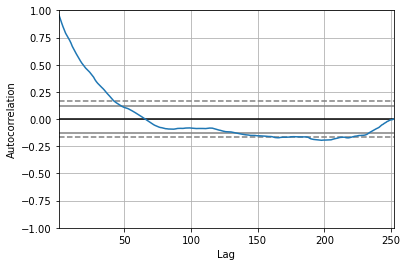

In [31]:
autocorrelation_plot(DISCA)
pyplot.show()

/Users/himanshi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/himanshi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/himanshi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:                  DISCA   No. Observations:                  252
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -343.622
Date:                Tue, 09 Mar 2021   AIC                            699.243
Time:                        12:23:45   BIC                            720.396
Sample:                             0   HQIC                           707.756
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0827      0.043      1.917      0.055      -0.002       0.167
ar.L2          0.1355      0.049      2.740      0.006       0.039       0.232
ar.L3         -0.0157      0.052     -0.301      0.7

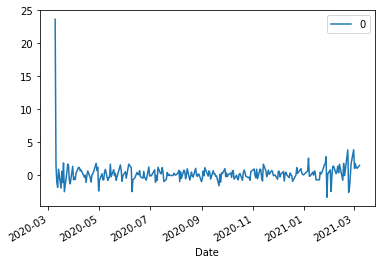

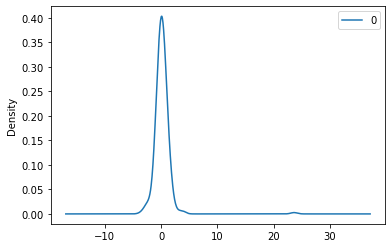

                0
count  252.000000
mean     0.203595
std      1.758924
min     -3.414509
25%     -0.396057
50%      0.105671
75%      0.633406
max     23.650000


In [32]:
#fit model
model = ARIMA(DISCA, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

C:\Users\Prachi Gopalani\Anaconda\envs\Hackthon\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


predicted=20.424584, expected=21.120001
predicted=21.056369, expected=21.120001
predicted=21.016988, expected=20.530001
predicted=20.331456, expected=21.430000
predicted=21.238238, expected=20.930000
predicted=21.073546, expected=22.120001
predicted=21.871280, expected=22.920000
predicted=22.885102, expected=22.440001
predicted=22.309243, expected=21.799999
predicted=21.581522, expected=23.120001
predicted=22.961492, expected=24.070000
predicted=24.126345, expected=24.299999
predicted=24.090575, expected=24.500000
predicted=24.217591, expected=25.030001
predicted=24.850463, expected=25.490000
predicted=25.396922, expected=26.500000
predicted=26.337697, expected=27.200001
predicted=27.075430, expected=27.299999
predicted=27.120417, expected=27.480000
predicted=27.310096, expected=26.910000
predicted=26.893361, expected=27.680000
predicted=27.591365, expected=28.370001
predicted=28.437131, expected=28.240000
predicted=28.169764, expected=28.480000
predicted=28.305775, expected=28.799999


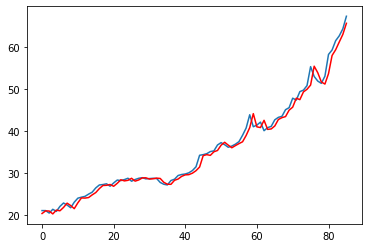

In [47]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

#DISCA.index = DISCA.index.to_period('M')
# split into train and test sets
X = DISCA.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
mse = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % mse)
# plot forecasts against actual outcomes
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

## Modelling by LSTM

In [31]:
num_companies = 10
look_back = 15
forward_days = 5
num_periods = 1

In [32]:
data.columns.levels

FrozenList([['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], ['DISCA', 'DVN', 'FANG', 'FCX', 'HAL', 'LB', 'MRO', 'SIVB', 'URI', 'VIAC']])

In [33]:
companies_names = list(ticker_list)
colors = ['r','g','c','m','y','k','w','b'] #from matplotlib

In [34]:
f = '/content/' + companies_names[0] + '.csv'
df_A = pd.read_csv(f)
df_A['Date'] = pd.to_datetime(df_A['Date'])

f = '/content/' + companies_names[1] + '.csv'
df_B = pd.read_csv(f)
df_B['Date'] = pd.to_datetime(df_B['Date'])

f = '/content/' + companies_names[2] + '.csv'
df_C = pd.read_csv(f)
df_C['Date'] = pd.to_datetime(df_C['Date'])

f = '/content/' + companies_names[3] + '.csv'
df_D = pd.read_csv(f)
df_D['Date'] = pd.to_datetime(df_D['Date'])

f = '/content/' + companies_names[4] + '.csv'
df_E = pd.read_csv(f)
df_E['Date'] = pd.to_datetime(df_E['Date'])

f = '/content/' + companies_names[5] + '.csv'
df_F = pd.read_csv(f)
df_F['Date'] = pd.to_datetime(df_F['Date'])

f = '/content/' + companies_names[6] + '.csv'
df_G = pd.read_csv(f)
df_G['Date'] = pd.to_datetime(df_G['Date'])

f = '/content/' + companies_names[7] + '.csv'
df_H = pd.read_csv(f)
df_H['Date'] = pd.to_datetime(df_H['Date'])

f = '/content/' + companies_names[8] + '.csv'
df_I = pd.read_csv(f)
df_I['Date'] = pd.to_datetime(df_I['Date'])

f = '/content/' + companies_names[9] + '.csv'
df_J = pd.read_csv(f)
df_J['Date'] = pd.to_datetime(df_J['Date'])

In [35]:
companies = [df_A, df_B, df_C, df_D, df_E, df_F, df_G, df_H, df_I, df_J]

for comapany in companies:
    comapany.set_index('Date', inplace=True)
    comapany.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)

In [36]:
print(len(df_A))
print(len(df_B))
print(len(df_C))
print(len(df_D))

251
251
251
251


### Data visualization

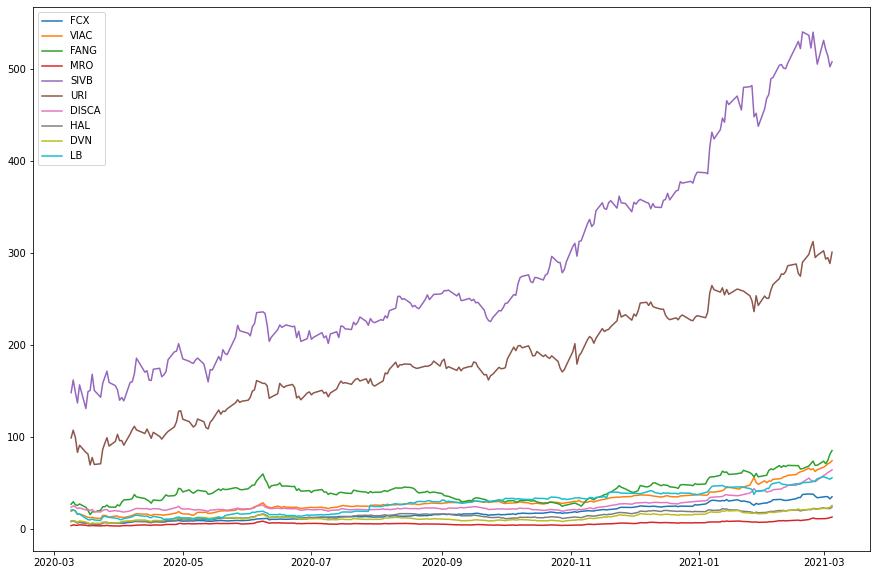

In [37]:
plt.figure(figsize = (15,10))

plt.plot(df_A, label=companies_names[0])
plt.plot(df_B, label=companies_names[1])
plt.plot(df_C, label=companies_names[2])
plt.plot(df_D, label=companies_names[3])
plt.plot(df_E, label=companies_names[4])
plt.plot(df_F, label=companies_names[5])
plt.plot(df_G, label=companies_names[6])
plt.plot(df_H, label=companies_names[7])
plt.plot(df_I, label=companies_names[8])
plt.plot(df_J, label=companies_names[9])


plt.legend(loc='best')
plt.show()

### Data normalization

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scl = MinMaxScaler()
args = [company.values.reshape(company.shape[0],1) for company in companies]

In [40]:
array = scl.fit_transform(np.concatenate((args[0],args[1],args[2],args[3],args[4],args[5],args[6],args[7],args[8],args[9]), axis=1))

## Applying LSTM

In [41]:
#split in Train and Test

division = len(array) - num_periods*forward_days

array_test = array[division-look_back:]
array_train = array[:division]

In [42]:
#Get the data and splits in input X and output Y, by spliting in `n` past days as input X 
#and `m` coming days as Y.
def processData(data, look_back, foward_days,num_companies,jump=1):
    X,Y = [],[]
    for i in range(0,len(data) -look_back -foward_days +1, jump):
        X.append(data[i:(i+look_back)])
        Y.append(data[(i+look_back):(i+look_back+foward_days)])
    return np.array(X),np.array(Y)

In [43]:
X_test,y_test = processData(array_test,look_back,forward_days,num_companies,forward_days)
y_test = np.array([list(a.ravel()) for a in y_test])

X,y = processData(array_train,look_back,forward_days,num_companies)
y = np.array([list(x.ravel()) for x in y])

from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.20, random_state=42)

In [44]:
print(X_train.shape)
print(X_validate.shape)
print(X_test.shape)
print(y_train.shape)
print(y_validate.shape)
print(y_test.shape)

(181, 15, 10)
(46, 15, 10)
(1, 15, 10)
(181, 50)
(46, 50)
(1, 50)


In [45]:
# load trained model
#model = load_model('Trained/single-company/LSTM_compA_LB40_FD10_E50_F50_S30.h5')

In [46]:
NUM_NEURONS_FirstLayer = 200
NUM_NEURONS_SecondLayer = 100
EPOCHS = 20

In [47]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [48]:
#Build the model
model = Sequential()

model.add(LSTM(NUM_NEURONS_FirstLayer,input_shape=(look_back,num_companies), return_sequences=True))
model.add(LSTM(NUM_NEURONS_SecondLayer,input_shape=(NUM_NEURONS_FirstLayer,1)))
model.add(Dense(forward_days * num_companies))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train,y_train,epochs=EPOCHS,validation_data=(X_validate,y_validate),shuffle=True,batch_size=1, verbose=2)

Epoch 1/20
181/181 - 35s - loss: 0.0118 - val_loss: 0.0084
Epoch 2/20
181/181 - 1s - loss: 0.0068 - val_loss: 0.0036
Epoch 3/20
181/181 - 1s - loss: 0.0050 - val_loss: 0.0034
Epoch 4/20
181/181 - 1s - loss: 0.0041 - val_loss: 0.0034
Epoch 5/20
181/181 - 1s - loss: 0.0040 - val_loss: 0.0036
Epoch 6/20
181/181 - 1s - loss: 0.0033 - val_loss: 0.0023
Epoch 7/20
181/181 - 1s - loss: 0.0030 - val_loss: 0.0022
Epoch 8/20
181/181 - 1s - loss: 0.0029 - val_loss: 0.0031
Epoch 9/20
181/181 - 1s - loss: 0.0033 - val_loss: 0.0019
Epoch 10/20
181/181 - 1s - loss: 0.0027 - val_loss: 0.0019
Epoch 11/20
181/181 - 1s - loss: 0.0029 - val_loss: 0.0022
Epoch 12/20
181/181 - 1s - loss: 0.0022 - val_loss: 0.0021
Epoch 13/20
181/181 - 1s - loss: 0.0030 - val_loss: 0.0020
Epoch 14/20
181/181 - 1s - loss: 0.0021 - val_loss: 0.0017
Epoch 15/20
181/181 - 1s - loss: 0.0027 - val_loss: 0.0022
Epoch 16/20
181/181 - 1s - loss: 0.0021 - val_loss: 0.0026
Epoch 17/20
181/181 - 1s - loss: 0.0021 - val_loss: 0.0022
Epoch

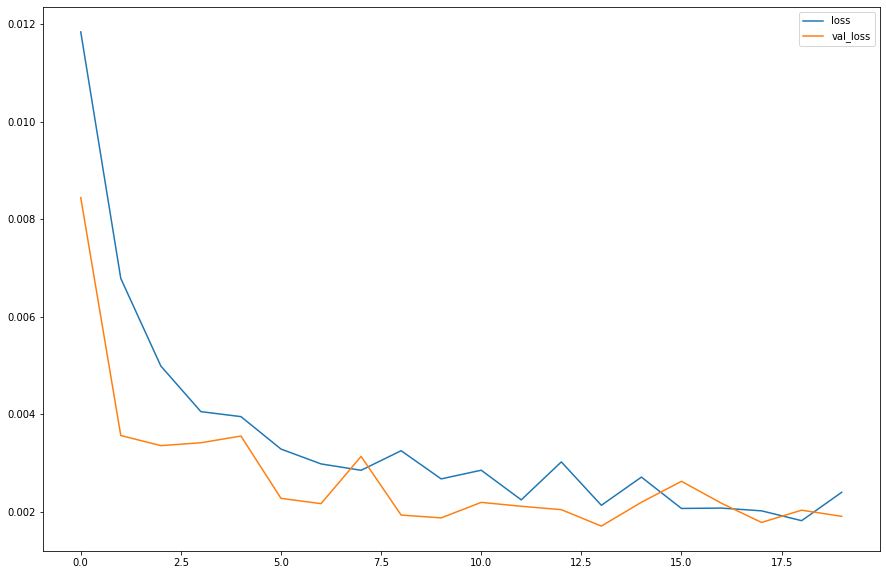

In [49]:
plt.figure(figsize = (15,10))

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='best')
plt.show()

In [50]:
#Saving the model
file_name = 'model5.h5'.format(look_back, forward_days, EPOCHS, NUM_NEURONS_FirstLayer, NUM_NEURONS_SecondLayer)
model.save(file_name)
print("Saved model `{}` to disk".format(file_name))

Saved model `model5.h5` to disk


## Predicting the Test Set to see the results

In [51]:
X_test,y_test = processData(array_test,look_back,forward_days,num_companies,forward_days)
y_test = np.array([list(a.ravel()) for a in y_test])

Xt = model.predict(X_test)
Xt.shape

(1, 50)

In [52]:
Xt.shape

(1, 50)

In [53]:
y_test.shape

(1, 50)

In [54]:
print("Evaluate")
result = model.evaluate(X_test,y_test,verbose=1)
result  #mse-------------------model accuracy

Evaluate
1/1 [==============================] - 1s 563ms/step - loss: 0.0225


0.02248992770910263

In [55]:
Xt.shape

(1, 50)

In [56]:
y_test.shape

(1, 50)

In [57]:
def do_inverse_transform(output_result,num_companies = 10):
    #From input/output nootbook: apply makeup, use scl.inverse_transform and remove makeup
    
    #transform to input shape
    original_matrix_format = []
    for result in output_result:
        #do inverse transform
        original_matrix_format.append(scl.inverse_transform([result[x:x+num_companies] for x in range(0, len(result), num_companies)]))
    original_matrix_format = np.array(original_matrix_format)
    
    #restore to original shape
    for i in range(len(original_matrix_format)):
        output_result[i] = original_matrix_format[i].ravel()

    return output_result

In [58]:
def prediction_by_step_by_company(raw_model_output, num_companies):
    matrix_prediction = []
    for i in range(0,num_companies):
        matrix_prediction.append([[lista[j] for j in range(i,len(lista),num_companies)] for lista in raw_model_output])
    return np.array(matrix_prediction)

In [59]:
Xt = do_inverse_transform(Xt)

MP = prediction_by_step_by_company(Xt, num_companies)
MP.shape

(10, 1, 5)

In [60]:
def target_by_company(raw_model_output, num_companies):
    matrix_target = [[] for x in range(num_companies)]
    
    for output in raw_model_output:
        for i in range (num_companies):
            for j in range(0,len(output),num_companies):
                matrix_target[i].append(output[i+j])
    return np.array(matrix_target)

In [61]:
Yt = do_inverse_transform(y_test)

MT = target_by_company(Yt, num_companies)
MT.shape

(10, 5)

In [62]:
MT.shape

(10, 5)

In [63]:
MP.shape

(10, 1, 5)

### Graphs

In [64]:
colors = ['r', 'g', 'c', 'm', 'y', 'k', 'w', 'b']

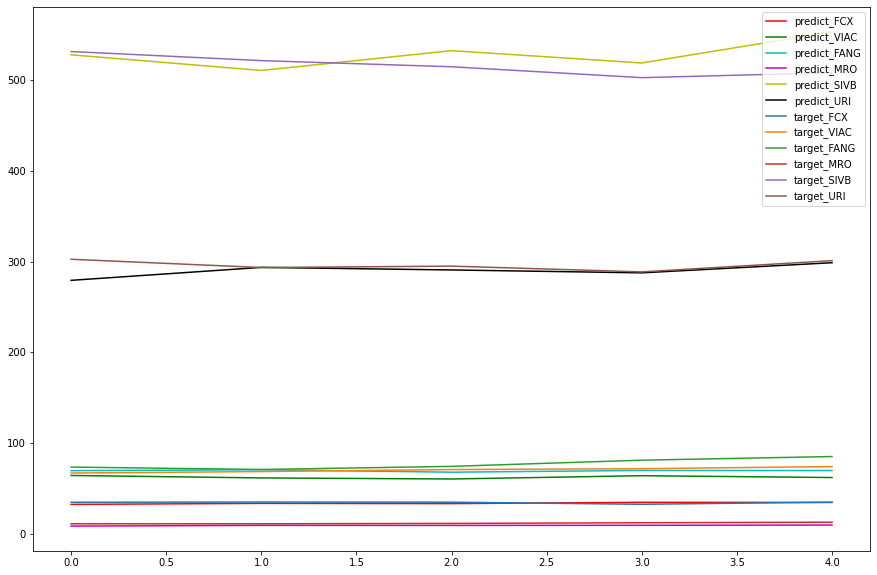

In [65]:
plt.figure(figsize = (15,10))

companies_to_show = [0,1,2,3,4,5] 


    
for id_company in companies_to_show:
    for i in range(0,len(MP[id_company])):
        plt.plot([x + i*forward_days for x in range(len(MP[id_company][i]))], MP[id_company][i], color=colors[id_company])
    plt.plot(0,MP[id_company][0][0] ,color=colors[id_company], label='predict_{}'.format(companies_names[id_company])) #only to place the label

   

for id_company in companies_to_show:
    plt.plot(MT[id_company], label='target_{}'.format(companies_names[id_company]))

plt.legend(loc='best')
plt.show()

### Predicting all the data to see how the model reacts to Train and Test set

In [66]:
X_all,y_all = processData(array,look_back,forward_days,num_companies,forward_days)
y_all = np.array([list(a.ravel()) for a in y_all])

In [67]:
Xt = model.predict(X_all)
Xt.shape

(47, 50)

In [68]:
Xt = do_inverse_transform(Xt)

MP = prediction_by_step_by_company(Xt, num_companies)
MP.shape

(10, 47, 5)

In [69]:
Yt = do_inverse_transform(y_all)

MT = target_by_company(Yt, num_companies)
MT.shape

(10, 235)

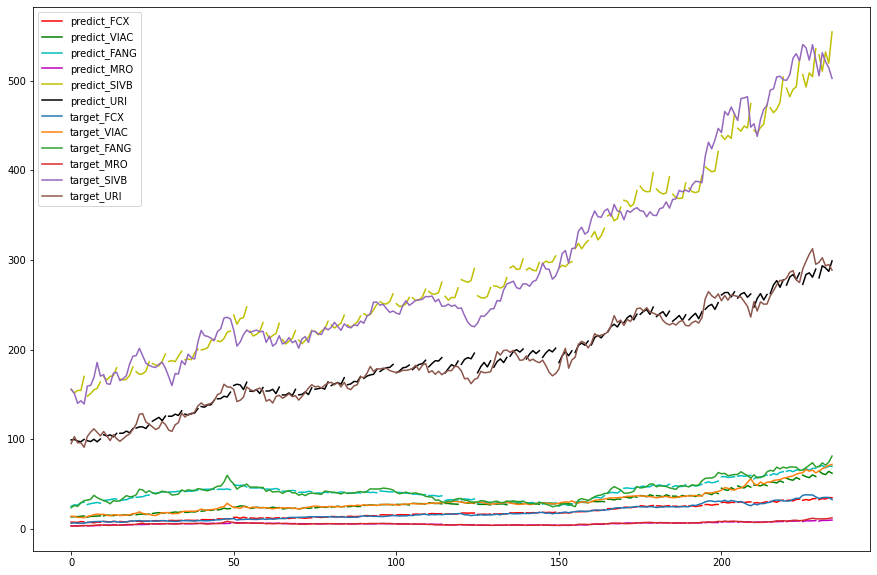

In [70]:
plt.figure(figsize = (15,10))

companies_to_show = [0,1,2,3,4,5]


    
for id_company in companies_to_show:
    for i in range(0,len(MP[id_company])):
        plt.plot([x + i*forward_days for x in range(len(MP[id_company][i]))], MP[id_company][i], color=colors[id_company])
    plt.plot(0,MP[id_company][0][0] ,color=colors[id_company], label='predict_{}'.format(companies_names[id_company])) #only to place the label

   

for id_company in companies_to_show:
    plt.plot(MT[id_company], label='target_{}'.format(companies_names[id_company]))

plt.legend(loc='best')
plt.show()